In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [13]:
# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Downloads\Employee.csv')
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [15]:
# List down unique values and their counts
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    print('-' * 50)

df.describe()

df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
df.head()


Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6
--------------------------------------------------
Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29
--------------------------------------------------
Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40
--------------------------------------------------
Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11
---------------------------------------------

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Missing values:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

After replacing 0 in age:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

After filling missing values:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


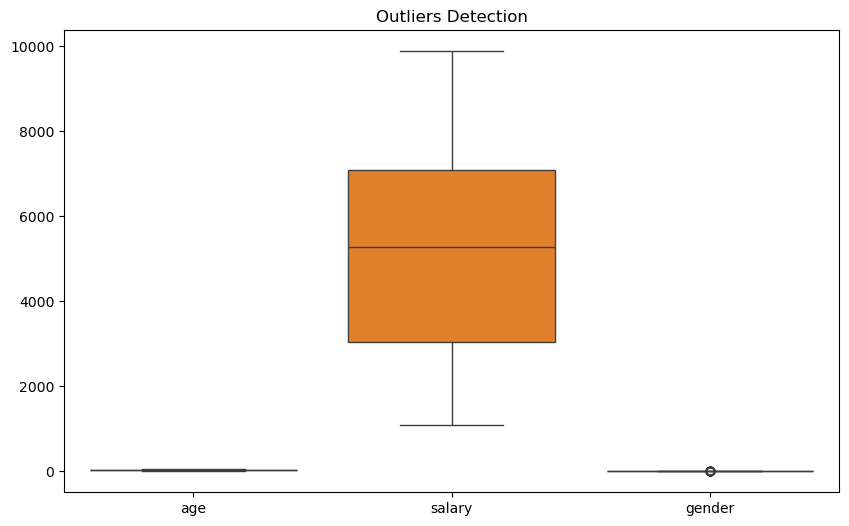

In [19]:
# Find missing values
print("Missing values:\n", df.isnull().sum())

# Replace '0' in 'age' column with NaN
df['age'] = df['age'].replace(0, pd.NA)

# Again checking missing values
print("\nAfter replacing 0 in age:\n", df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Handling missing values
# Replace numerical columns with mean and categorical with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are handled
print("\nAfter filling missing values:\n", df.isnull().sum())

# Find outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Outliers Detection")
plt.show()


     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


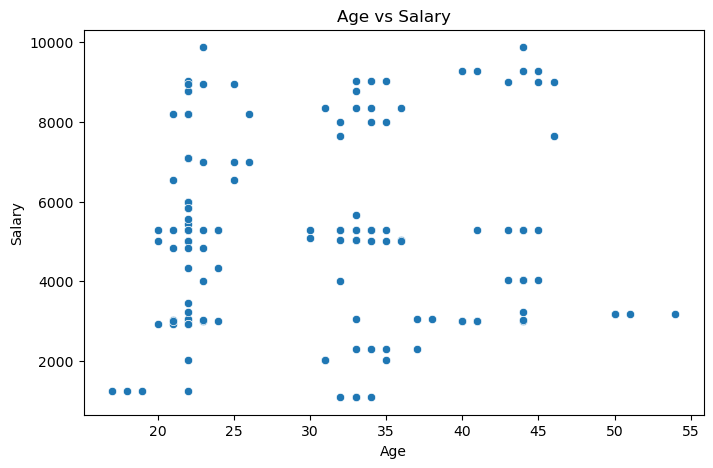

place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


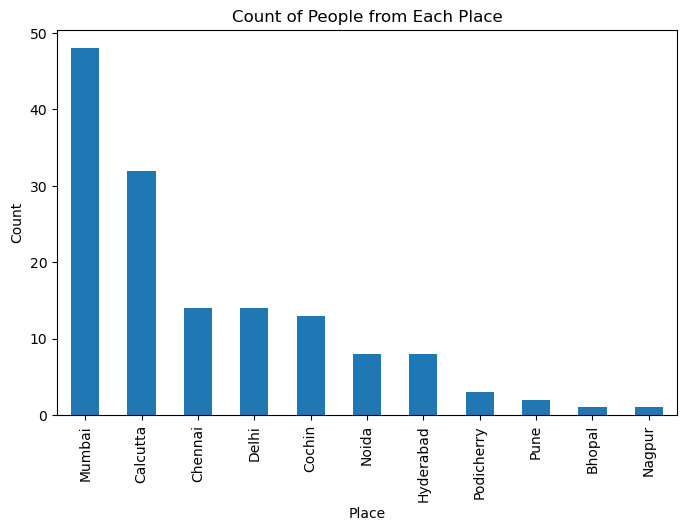

In [21]:
# Filter: age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print(filtered_df)

# Scatter plot between age and salary
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Count of people from each place
place_counts = df['place'].value_counts()
print(place_counts)

# Bar chart for place counts
plt.figure(figsize=(8,5))
place_counts.plot(kind='bar')
plt.title('Count of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()


In [23]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,company,age,salary,place,country,gender
0,4,20.0,5283.471074,2,0,0
1,2,30.0,5283.471074,6,0,0
2,4,35.0,2300.000000,1,0,0
3,2,40.0,3000.000000,4,0,0
4,4,23.0,4000.000000,6,0,0


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df)

standard_scaled_df = pd.DataFrame(standard_scaled, columns=df.columns)
print("Standard Scaled Data:")
standard_scaled_df.head()

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df)

minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=df.columns)
print("\nMinMax Scaled Data:")
minmax_scaled_df.head()


Standard Scaled Data:

MinMax Scaled Data:


,company,age,salary,place,country,gender
0,0.8,0.081081,0.477350,0.2,0.0,0.0
1,0.4,0.351351,0.477350,0.6,0.0,0.0
2,0.8,0.486486,0.137817,0.1,0.0,0.0
3,0.4,0.621622,0.217480,0.4,0.0,0.0
4,0.8,0.162162,0.331285,0.6,0.0,0.0
